# Analiza danych z raportu World Happiness Report 2019

dane zostałe pobrane z Kaggle: https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2019.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("world_happiness/2019.csv")

In [2]:
df.info

<bound method DataFrame.info of      Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986     

In [3]:
df.rename(columns={'Country or region': 'Country', 
                   'Score': 'Happiness_Score', 
                   'GDP per capita': 'GDP_per_Capita', 
                   'Social support': 'Social_Support', 
                   'Healthy life expectancy': 'Health_Life_Expectancy', 
                   'Freedom to make life choices': 'Freedom', 
                   'Generosity': 'Generosity', 
                   'Perceptions of corruption': 'Corruption'}, inplace=True)

### Obliczanie średnich wartości dla różnych zmiennych

In [4]:
avg_values = df[['GDP_per_Capita', 'Social_Support', 'Health_Life_Expectancy', 'Freedom', 'Generosity', 'Corruption']].mean()

### Dodanie kolumny z kategorią PKB per capita: "High" i "Low"

In [5]:
median_gdp = df['GDP_per_Capita'].median()
df['GDP_Category'] = np.where(df['GDP_per_Capita'] > median_gdp, 'High', 'Low')



### Zależności między zmiennymi: korelacje

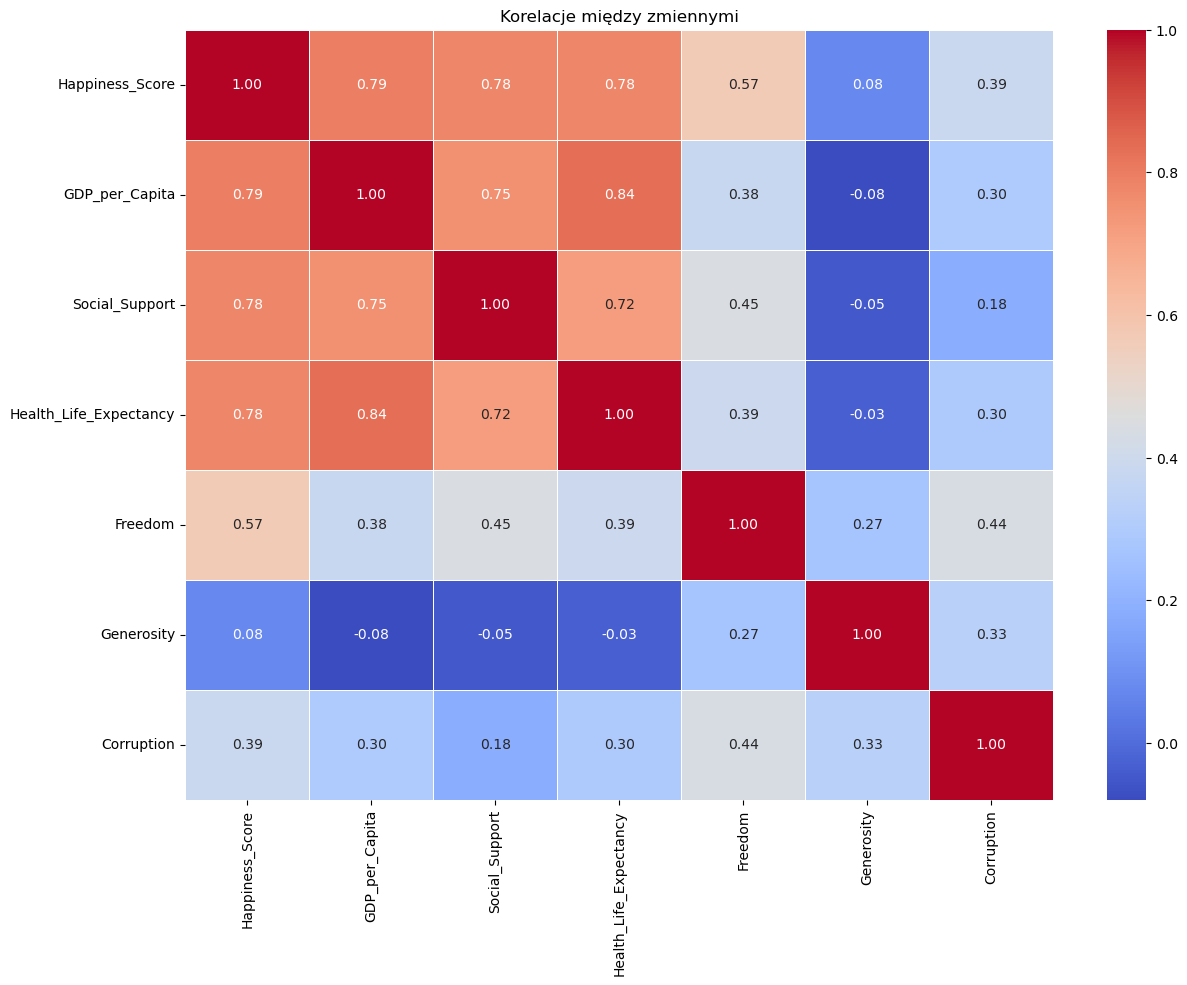

In [12]:
correlation_matrix = df[['Happiness_Score', 'GDP_per_Capita', 'Social_Support', 
                         'Health_Life_Expectancy', 'Freedom', 'Generosity', 'Corruption']].corr()
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelacje między zmiennymi')
plt.show()


### Przesunięcie danych: ranking krajów na podstawie różnych zmiennych

In [13]:
df['GDP_Rank'] = df['GDP_per_Capita'].rank(ascending=False)
df['Health_Rank'] = df['Health_Life_Expectancy'].rank(ascending=False)
df['Freedom_Rank'] = df['Freedom'].rank(ascending=False)

### Analiza krajów z najwyższym poziomem szczęścia

In [15]:
top_countries = df[df['Happiness_Score'] > 7][['Country', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support']]
top_countries_sorted = top_countries.sort_values(by='Happiness_Score', ascending=False)

### Rozkład poziomu szczęścia w zależności od kategorii PKB

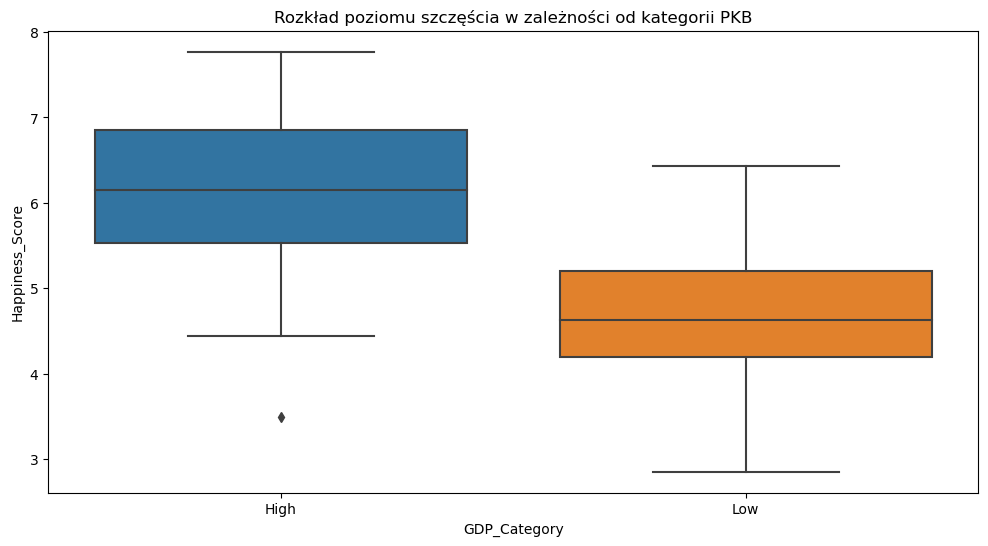

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='GDP_Category', y='Happiness_Score', data=df)
plt.title('Rozkład poziomu szczęścia w zależności od kategorii PKB')
plt.show()

### Jaki kraj jest negatywnym outlierem mając PKB wyższe od mediany?

In [18]:
high_gdp_low_happiness = df[(df['GDP_Category'] == 'High') & (df['Happiness_Score'] < 4)]

# Wyświetlenie nazw krajów spełniających ten warunek
countries_with_high_gdp_low_happiness = high_gdp_low_happiness['Country']

# Wyświetlanie wyników
print("Kraje z wysokim PKB i poziomem szczęścia poniżej 4:")
print(countries_with_high_gdp_low_happiness)

Kraje z wysokim PKB i poziomem szczęścia poniżej 4:
147    Botswana
Name: Country, dtype: object


### Analiza krajów z najniższym poziomem szczęścia

In [23]:
bottom_countries = df[df['Happiness_Score'] < 3.5][['Country', 'Happiness_Score', 'GDP_per_Capita']]
bottom_countries_sorted = bottom_countries.sort_values(by='Happiness_Score', ascending=True)
print(bottom_countries)

                      Country  Happiness_Score  GDP_per_Capita
147                  Botswana            3.488           1.041
148                     Syria            3.462           0.619
149                    Malawi            3.410           0.191
150                     Yemen            3.380           0.287
151                    Rwanda            3.334           0.359
152                  Tanzania            3.231           0.476
153               Afghanistan            3.203           0.350
154  Central African Republic            3.083           0.026
155               South Sudan            2.853           0.306


In [20]:
std_values = df[['GDP_per_Capita', 'Social_Support', 'Health_Life_Expectancy', 
                 'Freedom', 'Generosity', 'Corruption']].std()

### Tworzenie nowej kolumny Well_being_Index na podstawie kilku zmiennych

In [21]:
df['Well_being_Index'] = df['Happiness_Score'] * 0.3 + df['Freedom'] * 0.2 + df['Generosity'] * 0.2 + df['Social_Support'] * 0.3

### Najlepsze kraje pod względem Well_being_Index

In [24]:
final_df = df[['Country', 'Happiness_Score', 'GDP_per_Capita', 'Well_being_Index', 'Freedom', 'Generosity']]
final_df_sorted = final_df.sort_values(by='Well_being_Index', ascending=False)
print(final_df_sorted.head(10))

        Country  Happiness_Score  GDP_per_Capita  Well_being_Index  Freedom  \
0       Finland            7.769           1.340            2.9566    0.596   
3       Iceland            7.494           1.380            2.9244    0.591   
1       Denmark            7.600           1.383            2.9207    0.592   
2        Norway            7.554           1.488            2.9156    0.603   
4   Netherlands            7.488           1.396            2.8788    0.557   
5   Switzerland            7.480           1.452            2.8688    0.572   
7   New Zealand            7.307           1.303            2.8422    0.585   
6        Sweden            7.343           1.387            2.8172    0.574   
10    Australia            7.228           1.372            2.8106    0.557   
8        Canada            7.278           1.365            2.8087    0.584   

    Generosity  
0        0.153  
3        0.354  
1        0.252  
2        0.271  
4        0.322  
5        0.263  
7        0.

### Wizualizacja poziomu szczęścia dla krajów uszeregowanych według Well_being_Index

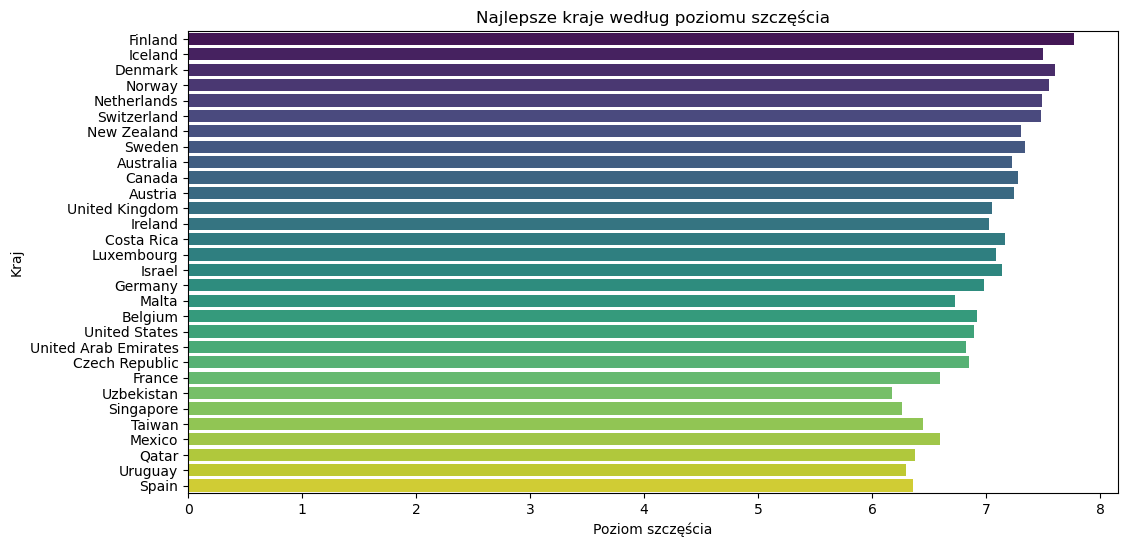

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Happiness_Score', y='Country', data=final_df_sorted.head(30), palette='viridis')
plt.title('Najlepsze kraje według poziomu szczęścia')
plt.xlabel('Poziom szczęścia')
plt.ylabel('Kraj')
plt.show()

In [28]:
print(final_df_sorted[final_df_sorted['Country'] == 'Poland'])

   Country  Happiness_Score  GDP_per_Capita  Well_being_Index  Freedom  \
39  Poland            6.182           1.206             2.406    0.483   

    Generosity  
39       0.117  
